<a href="https://colab.research.google.com/github/Balajireddy2002/20a91a0582/blob/main/lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LINK TO DOWNLOAD DATASET FOR WEEK-7:


https://www.kaggle.com/datasets/naveengowda16/logistic-regression-heart-disease-prediction

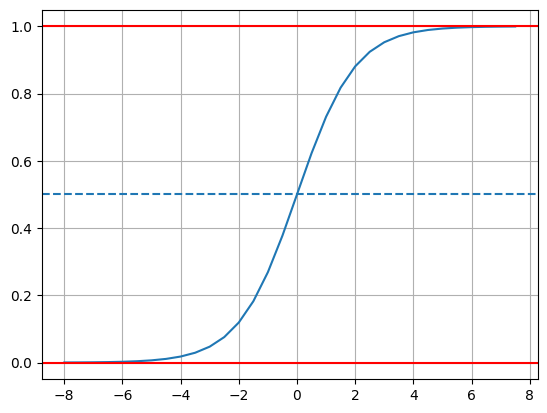

In [ ]:
#week7
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import the dataset into google colab
df=pd.read_csv('/framingham_heart_disease.csv')

#define a sigmoid function
def sigmoid_func(x):
    return 1.0 / (1 + math.exp(-x))

# create an array series
x = pd.Series(np.arange(-8, 8, 0.5))
y = x.map(sigmoid_func)

#plot the above generated series
plt.plot(x, y)
plt.grid(True)
plt.axhline(y=0.5, xmin=0, xmax=10, ls='dashed')
plt.axhline(y=1.0, xmin=0, xmax=10, color='r')
plt.axhline(y=0.0, xmin=0, xmax=10, color='r')

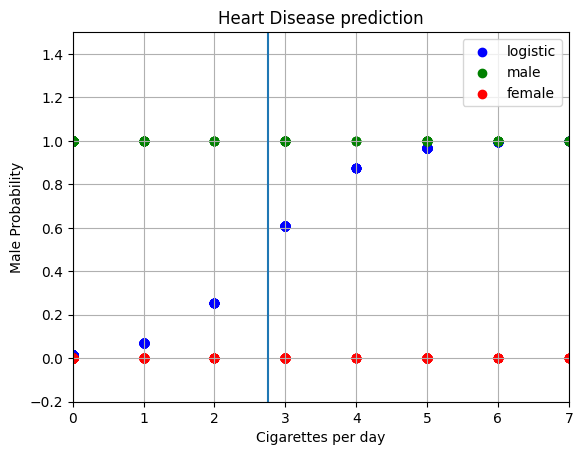

In [ ]:
#plot the values
plt.scatter(x=df.cigsPerDay, y=y_vals, color='b', label='logistic')
plt.scatter(x=df[df.male==1].cigsPerDay, y=df[df.male==1].male, color='g', label='male')
plt.scatter(x=df[df.male==0].cigsPerDay, y=df[df.male==0].male, color='r', label='female')
plt.title("Heart Disease prediction")
plt.xlabel("Cigarettes per day")
plt.ylabel("Male Probability")
plt.legend()
plt.grid(True)
plt.xlim((0, 7))
plt.ylim((-0.2, 1.5))
plt.axvline(x=2.75, ymin=0, ymax=1)
plt.show()

Epoch 1/5
235/235 [==============================] - 4s 15ms/step - loss: 0.2766 - val_loss: 0.1921
Epoch 2/5
235/235 [==============================] - 2s 10ms/step - loss: 0.1728 - val_loss: 0.1551
Epoch 3/5
235/235 [==============================] - 3s 11ms/step - loss: 0.1459 - val_loss: 0.1351
Epoch 4/5
235/235 [==============================] - 2s 10ms/step - loss: 0.1302 - val_loss: 0.1228
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


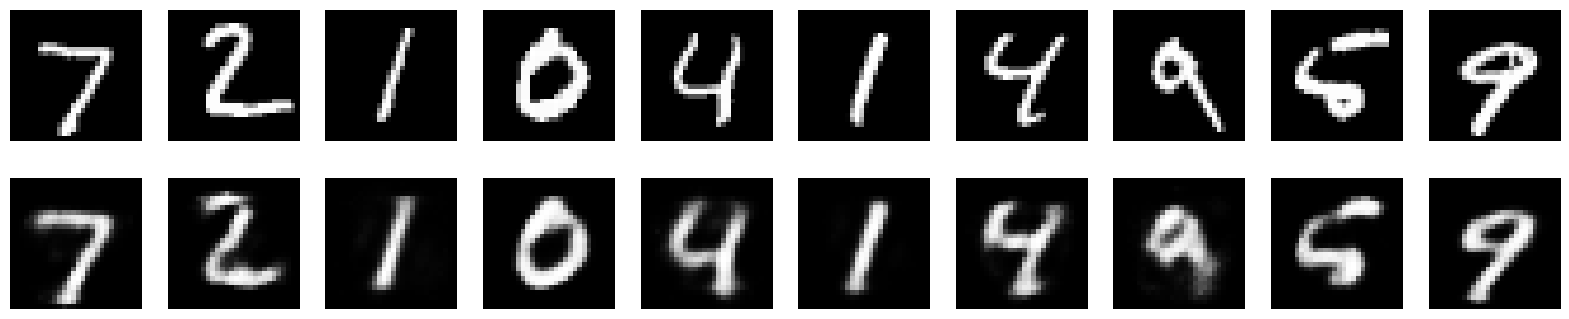

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# Create a simple autoencoder
encoding_dim = 32
input_layer = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(inputs=input_layer, outputs=decoded)
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# Train the autoencoder
epochs = 5
batch_size = 256
autoencoder.fit(x_train, x_train, epochs=epochs, batch_size=batch_size, shuffle=True, validation_data=(x_test, x_test))
# Encode and decode data
encoded_imgs = autoencoder.predict(x_test)
# Plot original and decoded images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    # Decoded images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()